In [103]:
import importlib
import modules

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt


Transient length: no transient found


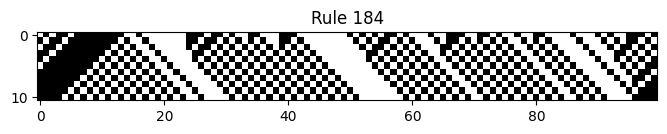

In [104]:
ca_184 = CA()

p = 0.5
L = 100
initial_state = ca_184.gen_initial_state_bernoulli(L, p)
lambda_parameter, evolution = ca_184.gen_CA(L, r=1, k=2, dec_rule=184, t_end=10, s_q='0')
transient_length = ca_184.calculate_transient_length()

plt.figure(figsize=(8,10))
plt.title(f'Rule 184')
plt.imshow(evolution, cmap='binary')

print(f"Transient length: {transient_length}")


In [105]:
import cellpylib as cpl
import numpy as np

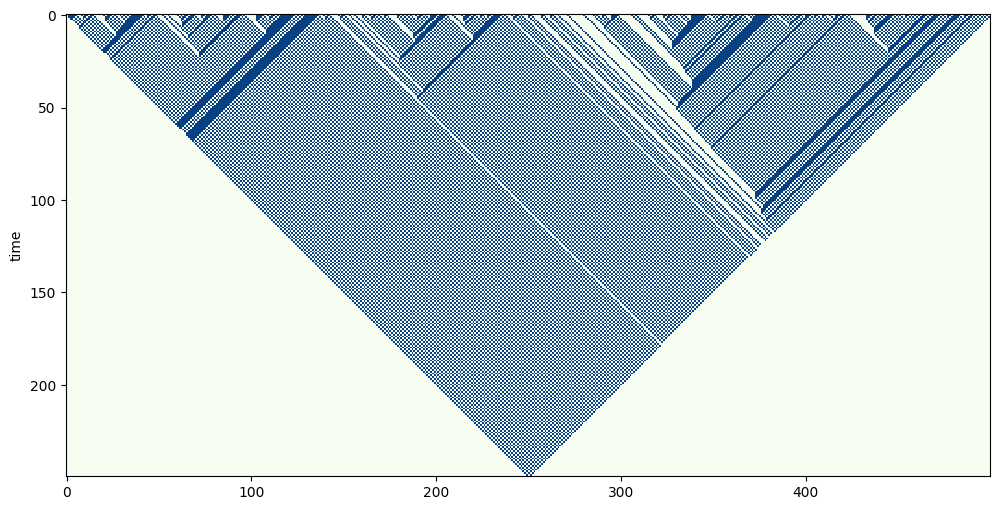

In [122]:
importlib.reload(modules)
from modules import triangulize_evolution

p = 0.5
L = 500
T = int(L / 2)
initial_state = ca_184.gen_initial_state_bernoulli(L, p)

# print(cellular_automaton)
cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
cellular_automaton = triangulize_evolution(cellular_automaton)

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(cellular_automaton, colormap='GnBu')



In [123]:
importlib.reload(modules)
from modules import find_elem_jams

jams = find_elem_jams(cellular_automaton)
print(f"The jams in the evolution above are: {jams}")
print(f"\'[[i, j], size]\' with i and j being the row coordinates in the row that the jam was last found in and size being the size of the jam.")
jam_sizes = [jam[1] for jam in jams]
print(f"Jam sizes: {jam_sizes}")

The jams in the evolution above are: [[[2, 3], 11], [[7, 8], 8], [[7, 8], 14], [[20, 21], 10], [[20, 21], 107], [[24, 25], 42], [[24, 25], 48], [[61, 62], 8], [[61, 62], 23], [[61, 62], 40], [[61, 62], 51], [[61, 62], 107], [[61, 62], 125], [[61, 62], 255], [[61, 62], 292], [[61, 62], 385], [[67, 69], 535], [[140, 141], 4], [[148, 149], 4], [[160, 161], 2], [[165, 166], 4], [[172, 173], 2], [[179, 180], 2], [[180, 181], 31], [[180, 181], 58], [[180, 181], 87], [[190, 191], 79], [[190, 191], 84], [[190, 191], 103], [[190, 191], 123], [[190, 191], 156], [[242, 243], 4], [[250, 251], 2], [[257, 258], 2], [[262, 263], 2], [[290, 291], 2], [[291, 292], 17], [[316, 317], 4], [[323, 324], 2], [[324, 325], 6], [[328, 329], 103], [[330, 331], 55], [[330, 331], 63], [[330, 331], 69], [[330, 331], 77], [[330, 331], 352], [[340, 341], 114], [[340, 341], 125], [[349, 350], 114], [[349, 350], 122], [[349, 350], 139], [[349, 350], 144], [[373, 374], 242], [[373, 374], 249], [[373, 374], 290], [[373, 

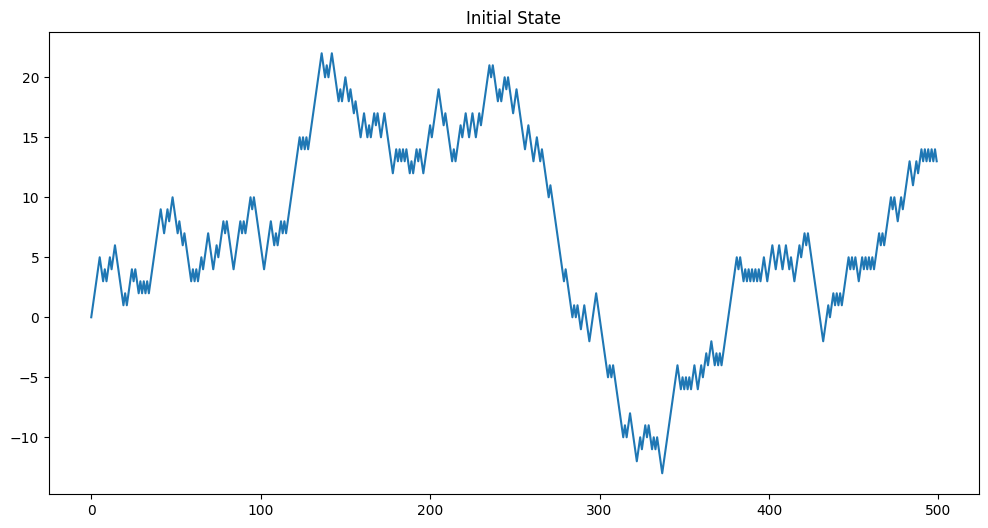

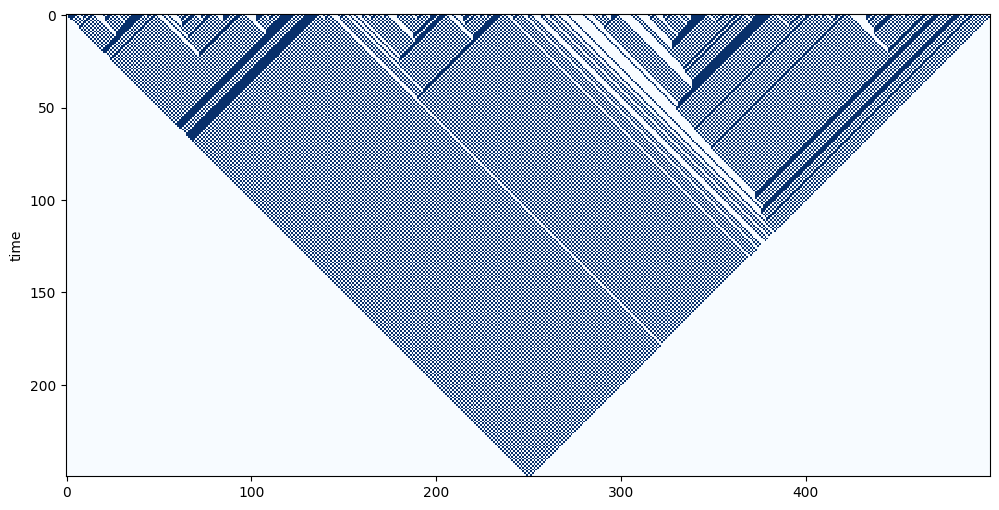

In [124]:
importlib.reload(modules)
from modules import triangulize_evolution
from modules import initial_to_random_walk

# Plot the random walk that is the initial state, go up for 1, down for 0
random_walk = initial_to_random_walk(initial_state)

plt.figure(figsize=(12,6))
plt.title(f'Initial State')
plt.plot(random_walk)

cellular_automaton = triangulize_evolution(cellular_automaton)

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(cellular_automaton, colormap='Blues')





In [198]:
importlib.reload(modules)
from modules import run_model

p = 0.5
L = 1000
T = int(L / 2)
n = 100

lifespan_counter, jam_size_counter = run_model(p, L, T, n)

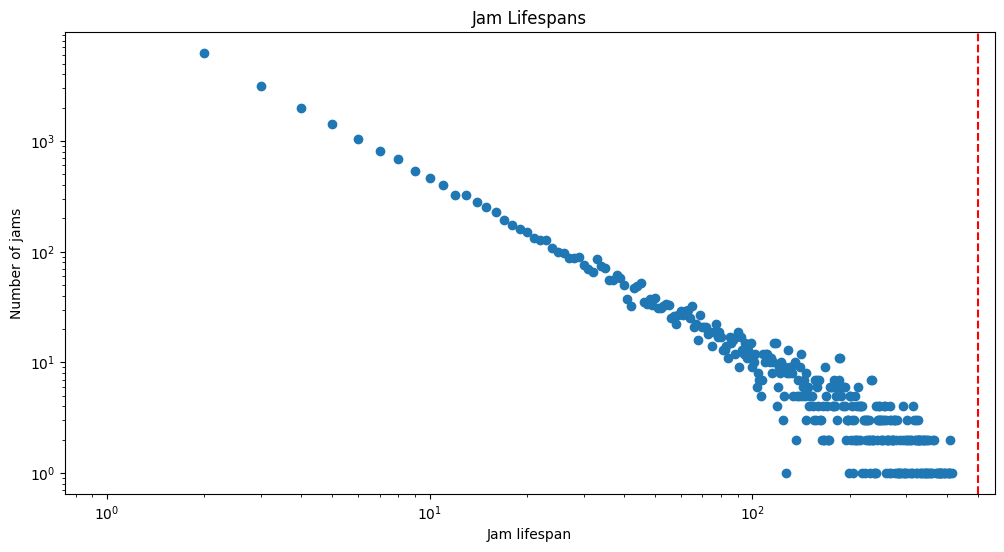

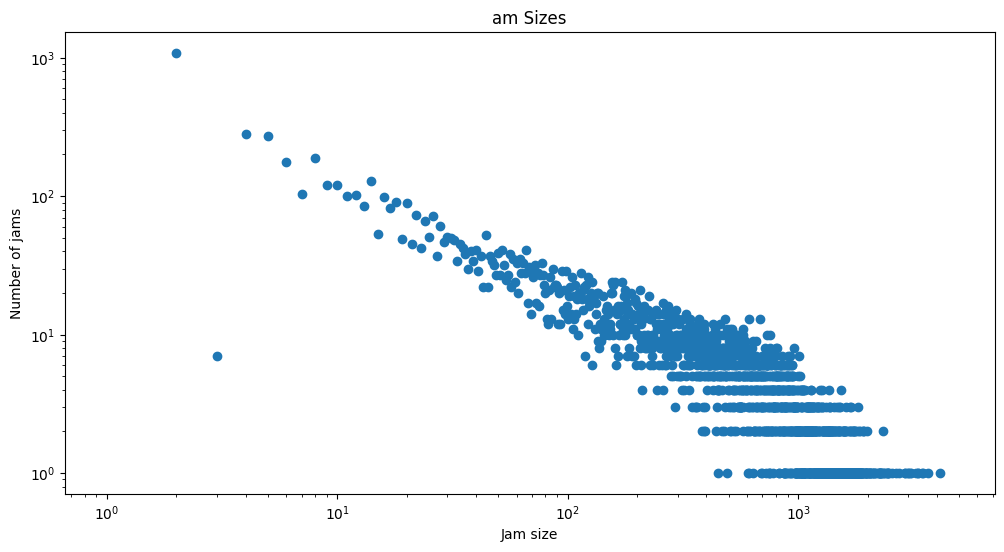

In [199]:
plt.figure(figsize=(12,6))
plt.title(f'Jam Lifespans')
plt.loglog(range(1, int(max(lifespan_counter.keys()))), [lifespan_counter[i] for i in range(1, int(max(lifespan_counter.keys())))], 'o')
plt.xlabel('Jam lifespan')
plt.ylabel('Number of jams')

# Add a vertical line at T
plt.axvline(x=T, color='red', linestyle='--')
plt.show()

plt.figure(figsize=(12,6))
plt.title(f'am Sizes')
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.show()